In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#check missing data

<Axes: >

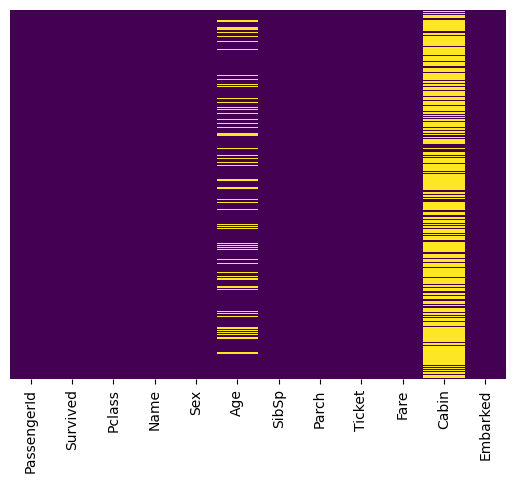

In [8]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='viridis')
#True is yellow, missing data, 20% age is missing, lots of data are missing for Cabin, so we will drop this variable later or create a vairable cabine known or not

In [48]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

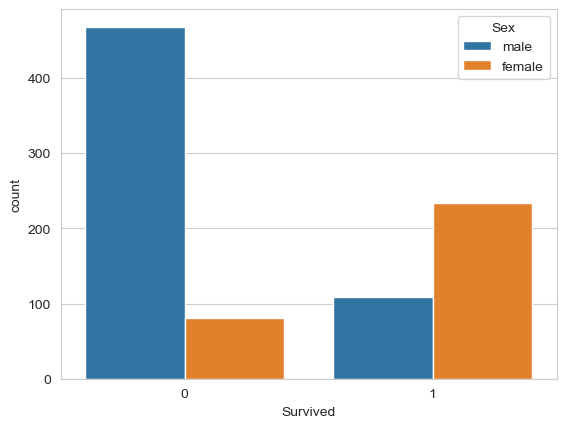

In [49]:
sns.countplot(x='Survived', hue='Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

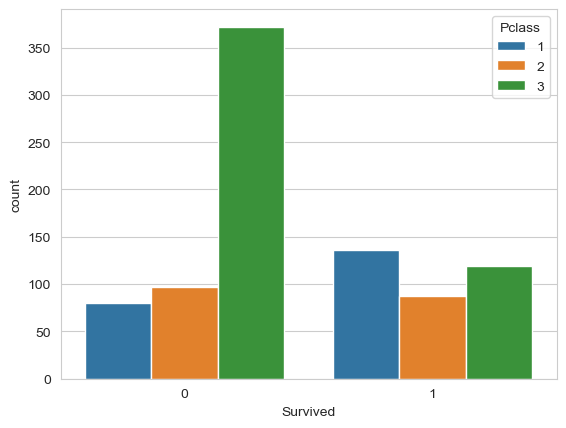

In [12]:
sns.countplot(x='Survived', hue='Pclass',data=train)

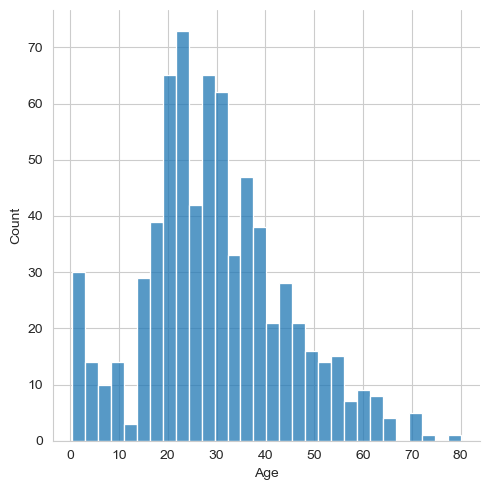

In [13]:
sns.displot(x='Age', data=train, bins=30)

<Axes: ylabel='Frequency'>

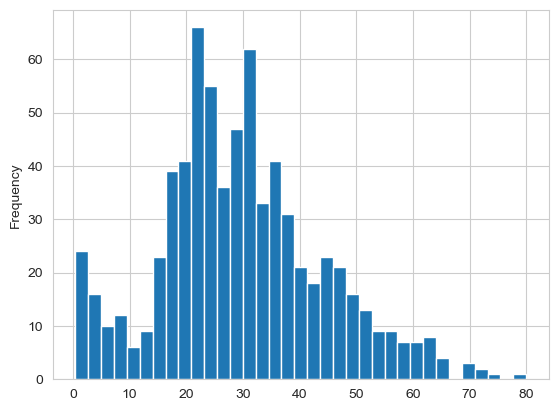

In [15]:
train['Age'].plot.hist(bins=35)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

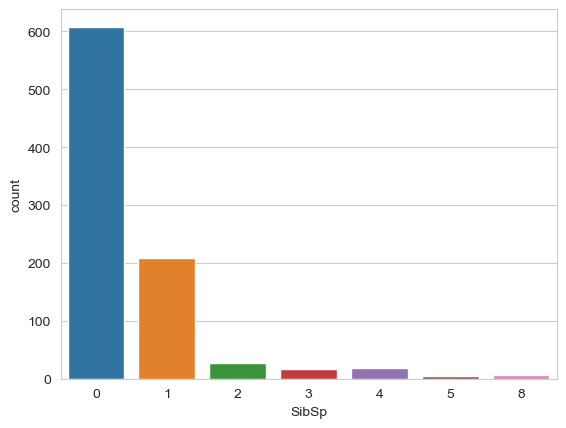

In [17]:
sns.countplot(x='SibSp', data=train)

<Axes: ylabel='Frequency'>

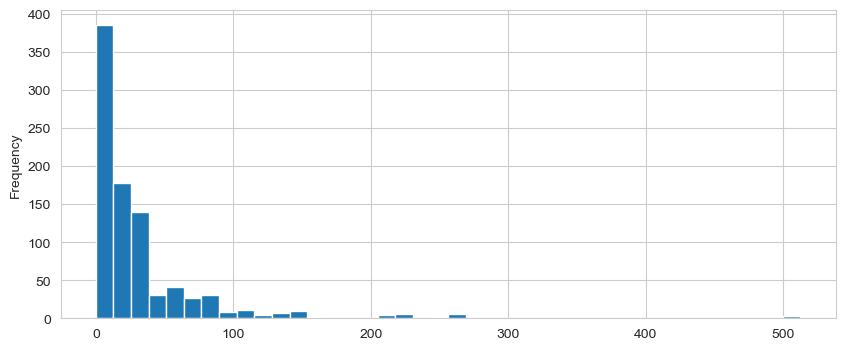

In [20]:
train['Fare'].plot.hist(bins=40, figsize=(10,4))

In [21]:
import cufflinks as cf
cf.go_offline()

In [23]:
train['Fare'].iplot(kind='hist', bins=50)

In [24]:
#cleaning data for Machine Leanring

In [25]:
#imputation - for example, fill in missing age using average age from each passenger class

<Axes: xlabel='Pclass', ylabel='Age'>

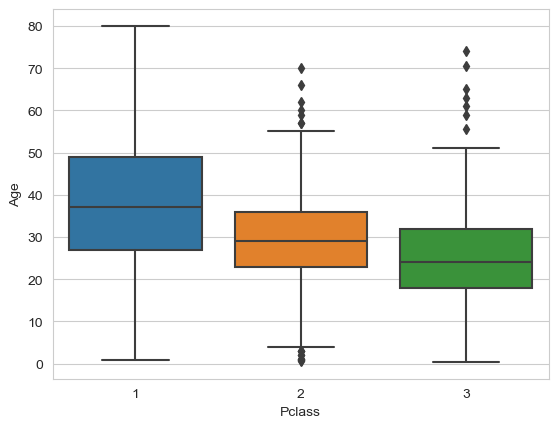

In [27]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [50]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age


In [51]:
train['Age']=train[['Age','Pclass']].apply(impute_age, axis =1)

<Axes: >

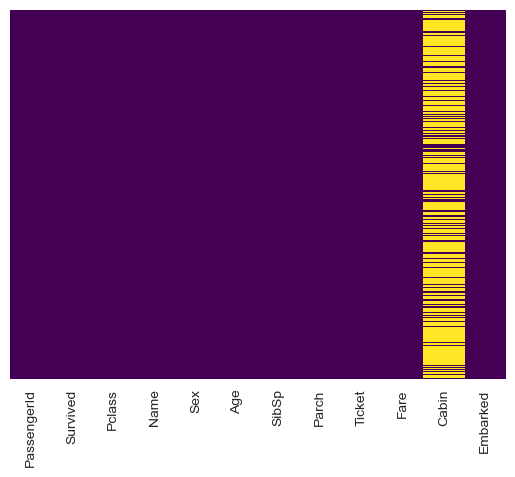

In [52]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [53]:
train.drop('Cabin', axis=1, inplace=True)

In [34]:
train.dropna(inplace=True)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [55]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [56]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [57]:
train = pd.concat([train, sex, embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
train.drop(['Name','Sex','Embarked','Ticket'], axis=1, inplace=True)
train.head()

In [60]:
train.drop(['PassengerId'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [65]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [68]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [70]:
train = pd.concat([train,pclass], axis=1)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,1,0
887,1,1,19.0,0,0,30.0000,0,0,1,0,0
888,0,3,24.0,1,2,23.4500,0,0,1,0,1
889,1,1,26.0,0,0,30.0000,1,0,0,0,0
